Raster CRS: EPSG:32631


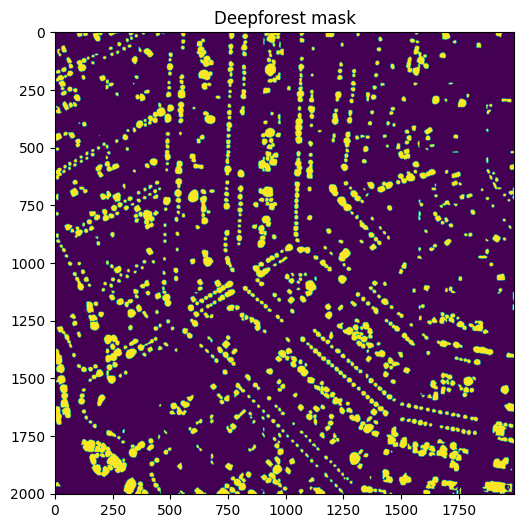

In [83]:
import rasterio as rio
from rasterio.crs import CRS
import matplotlib.pyplot as plt

# Specify the path to your raster file
raster_path = "/Users/michiel/Documents/code/SCL/images/Lukas/verification.tif"

# Load the raster data
with rio.open(raster_path) as src:
    # Read the first band (change index if needed)
    raster_bounds = src.bounds
    band1 = src.read(1)
    # Get metadata (optional)
    print(f"Raster CRS: {src.crs}")

# Plotting the raster data
plt.figure(figsize=(10, 6))
plt.imshow(band1) 
plt.title('Deepforest mask')
plt.show()


In [71]:
import pandas as pd 
import geopandas as gpd
df2 = pd.read_csv('/Users/michiel/Documents/code/SCL/BOMEN.csv', delimiter = ';')
df2.head()

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891


In [72]:
gdf2 = gpd.GeoDataFrame(
     df2,
     geometry=gpd.points_from_xy(df2['LNG'], df2['LAT']),
     crs = 'EPSG:4326'
     )

gdf2['geometry'] = gdf2['geometry'].to_crs(32631)

gdf2.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
gdf2.head()

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,geometry
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093,POINT (629622.647 5800569.543)
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984,POINT (626411.183 5799583.7)
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837,POINT (629663.679 5801543.75)
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056,POINT (627793.86 5800628.959)
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891,POINT (628122.827 5799728.823)


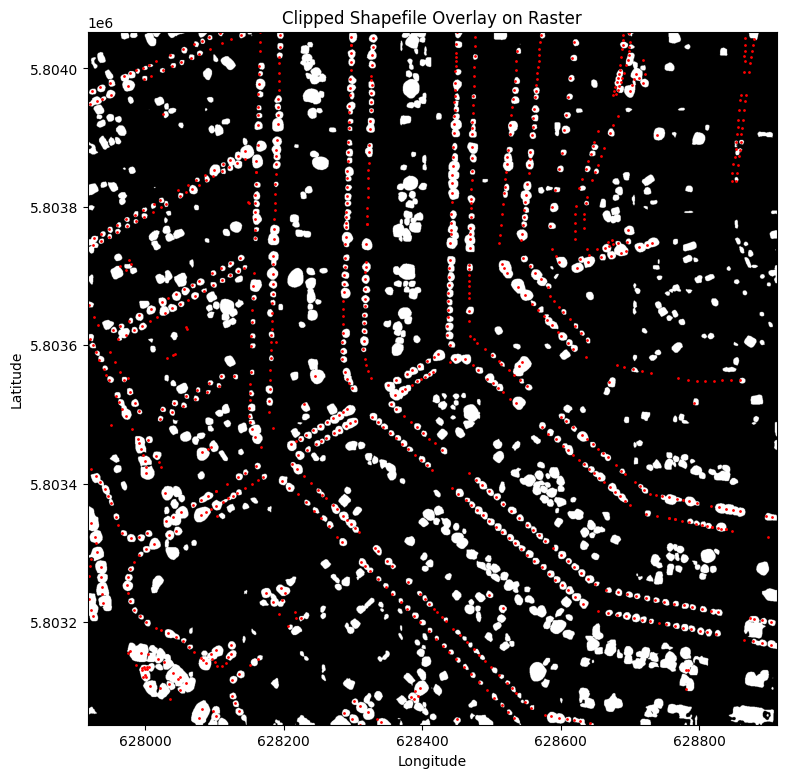

In [81]:
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box


# Create a bounding box from raster bounds
bbox = box(raster_bounds.left, raster_bounds.bottom, 
            raster_bounds.right, raster_bounds.top)



# Clip the GeoDataFrame to the bounding box
gdf_clipped = gdf2[gdf2.intersects(bbox)]

# Optionally transform CRS if necessary (to match raster)
gdf_clipped = gdf_clipped.to_crs(src.crs)

# Create a plot to visualize results
fig, ax = plt.subplots(figsize=(15, 9))

# Plot raster data
show(band1, ax=ax, cmap='gray', extent=rio.plot.plotting_extent(src))

# Plot clipped shapefile on top of raster
gdf_clipped.plot(ax=ax, color='red', markersize=1)

# Set titles and labels
plt.title('ADAM trees Overlay on deepforest mask')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save clipped shapefile if needed
# gdf_clipped.to_file("/path/to/save/clipped_shapefile.shp")  # Update path accordingly
